In [19]:
# Import all required libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
# Read the CSV data and convert into DataFrame
url = 'melb_data.csv'
data = pd.read_csv(url)

In [21]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [22]:
# Preprocess the data for optimal model
data = data.dropna() # Removes all the rows which have an empty value
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


<AxesSubplot:xlabel='YearBuilt', ylabel='Price'>

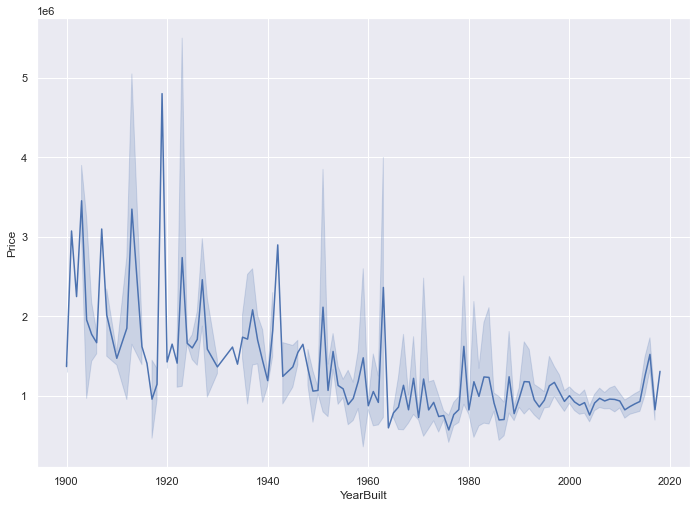

In [23]:
# Show trend of price for the years 1900 - 2020
plot_data = data.where(data['YearBuilt'] >= 1900)
y = plot_data.Price
X = plot_data.YearBuilt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(X, y)

In [ ]:
def prediction_v_true(y_true, y_pred):
    X = [i for i in range(len(y_true))]
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes()
    plt.xlabel("Data Index")
    plt.ylabel("Price of Estate")
    ax.plot(X, y_true, label='True Values')
    ax.plot(X, y_pred, label='Predictions')
    ax.legend()

In [25]:
# Takes training data and leaf nodes as parameter and returns a Decision Tree Model
def getDecisionTreeModel(X, y, max_leaf_nodes):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(X, y)
    return model

In [26]:
# Selecting the factors and the value to be predicted as X and y respectively
y = data.Price
melbourne_features = ['Rooms', 'YearBuilt', 'Landsize', 'Lattitude', 'Longtitude']
X = data[melbourne_features]

In [27]:
# Split our data into Training and Testing sets, and receiving a Decision Tree model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
dt_model = getDecisionTreeModel(train_X, train_y, 42)

In [28]:
# Make predictions on val_X and compare results to val_y
predictions_y = dt_model.predict(val_X)
dt_model_mae = mean_absolute_error(val_y, predictions_y)
# Printing Predicted and Actual values (First 5)
print('Decision Tree')
print('\n\nCorrect Value\tPredictions\n')
for i in range(5):
   print(str(val_y.iloc[i]) + '\t' + str(predictions_y[i]))

Decision Tree


Correct Value	Predictions

620000.0	698876.3440860215
2320000.0	2923675.6756756757
750000.0	1088248.0
1120000.0	1566271.4285714286
6500000.0	3732166.6666666665


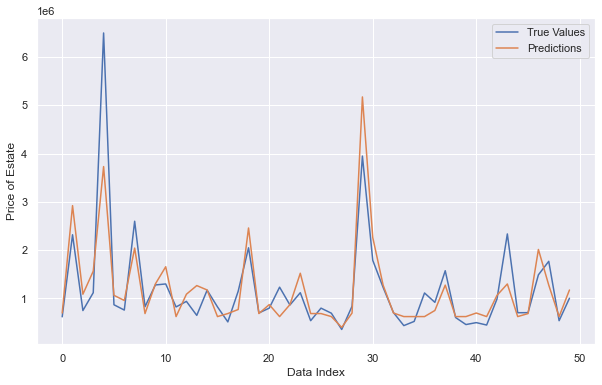

In [29]:
prediction_v_true(val_y[:50], predictions_y[:50])

In [30]:
# Takes training data and leaf nodes as parameter and returns a Random Forest Regressor Model
def getRandomForestRegressor(X, y, max_leaf_nodes):
    rt_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
    rt_model.fit(X, y)
    return rt_model

In [31]:
# Split our data into Training and Testing sets, and receiving a model
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rt_model = getRandomForestRegressor(train_X, train_y, 42)

In [32]:
# Make predictions on val_X and compare results to val_y
predictions_y = rt_model.predict(val_X)
rt_model_mae = mean_absolute_error(val_y, predictions_y)

# Printing Predicted and Actual values (First 5)
print('Random Forest:')
print('Correct Value\tPredictions\n')
for i in range(5):
   print(str(val_y.iloc[i]) + '\t' + str(predictions_y[i]))

Random Forest:
Correct Value	Predictions

620000.0	574718.0
2320000.0	2612140.0
750000.0	785780.0
1120000.0	1598105.0
6500000.0	3980430.0


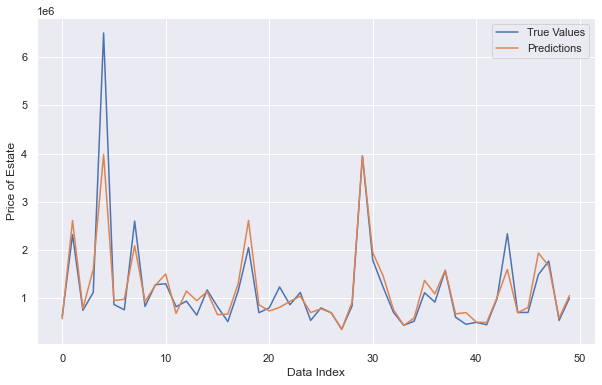

In [33]:
prediction_v_true(val_y[:50], predictions_y[:50])

In [34]:
# Lower the Mean Absolute Error, the more accurate the model is
if rt_model_mae < dt_model_mae:
    accurate_model = rt_model
    model_type = "Random Forest"
else:
    accurate_model = dt_model
    model_type = "Decision Tree"

In [35]:
# User Input Cell
user_rooms = int(input("Enter the number of rooms: "))
user_year = int(input("Enter the year of construction: "))
user_landsize= float(input("Enter the land size: "))
user_latitude= float(input("Enter the latitude: "))
user_longitude= float(input("Enter the longitude: "))
user_data = {
    'Rooms':  [user_rooms],
    'YearBuilt': [user_year],
    'Landsize': [user_landsize],
    'Lattitude': [user_latitude],
    'Longitude': [user_longitude],
}
user_arr = pd.DataFrame(user_data, columns = ['Rooms', 'YearBuilt', 'Landsize', 'Lattitude', 'Longitude'])

user_prediction = accurate_model.predict(user_arr)

print('\n\nThe property should be sold for $'+str(user_prediction[0]))
print('\n\nModel used: ', model_type)

Enter the number of rooms: 1
Enter the year of construction: 1920
Enter the land size: 13445
Enter the latitude: 35555
Enter the longitude: 23333


The property should be sold for $1049625.0


Model used:  Random Forest


In [36]:
5

5